                                                              Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
hed=pd.read_csv('/content/heart (1).csv')

In [ ]:
hed.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
hed.tail(10)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
hed.shape

(303, 14)

In [ ]:
hed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
hed.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
hed.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
hed['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [ ]:
x=hed.drop(columns='target',axis=1)

In [ ]:
y=hed['target']

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [ ]:
[x_train.shape,x_train.shape, y_train.shape, y_test.shape]

[(272, 13), (272, 13), (272,), (31,)]

In [ ]:
leg=LogisticRegression()

In [ ]:
leg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
x_tr_d=leg.predict(x_train)

In [ ]:
trdaac=accuracy_score(y_train, x_tr_d)
print("Accuracy on Training data is :",trdaac)

Accuracy on Training data is : 0.8382352941176471


In [ ]:
x_test_d=leg.predict(x_test)
testdacc=accuracy_score(y_test, x_test_d)
print("Accuracy on Test data is;",testdacc)

Accuracy on Test data is; 0.9354838709677419


In [ ]:
input_data=[67,1,0,160,286,0,0,108,1,1.5,1,3,2]
inpasnum=np.array(input_data)
inres=inpasnum.reshape(1,-1)

In [ ]:
pred=leg.predict(inres)
pred
if(pred[0]==0):
  print("The person does not have any heart disease")
else:
  print("The person have heart disease")

The person does not have any heart disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


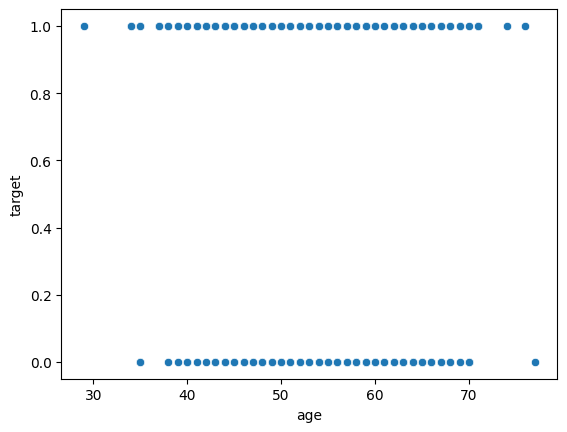

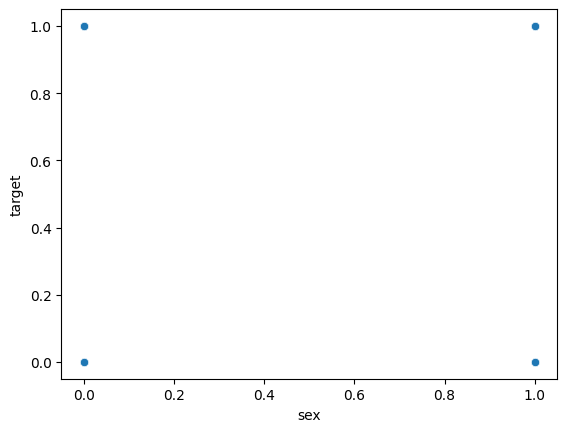

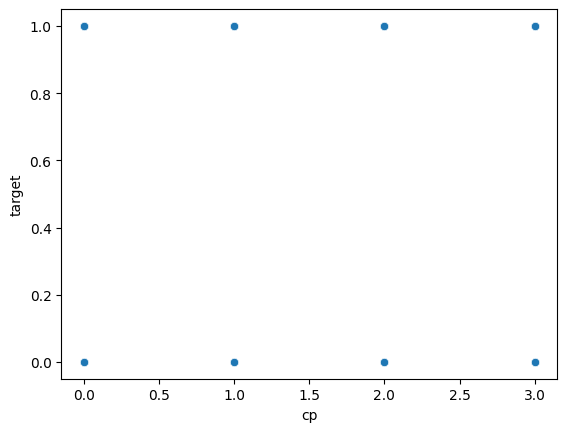

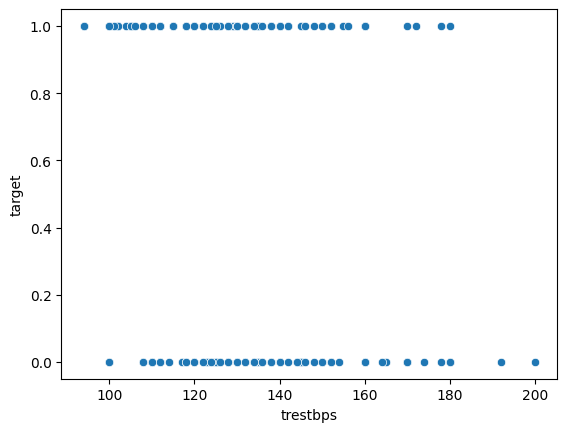

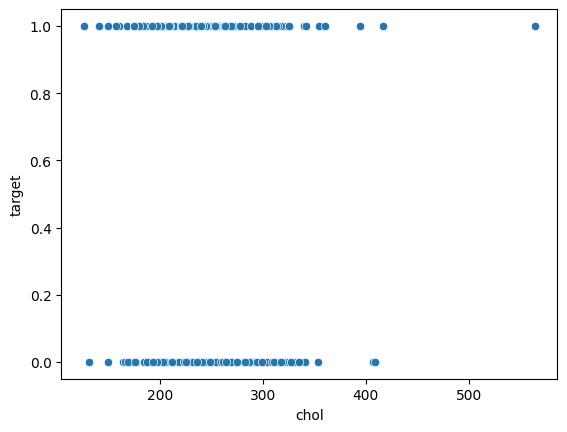

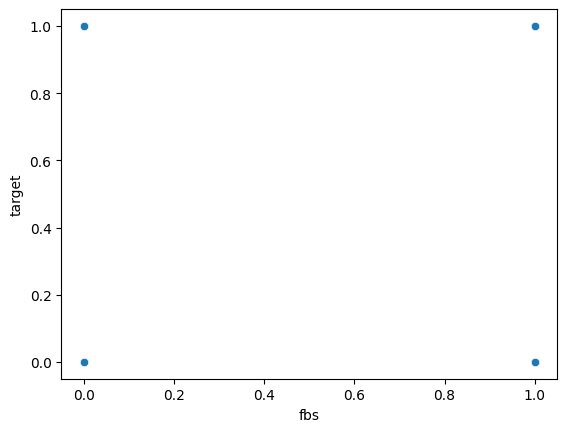

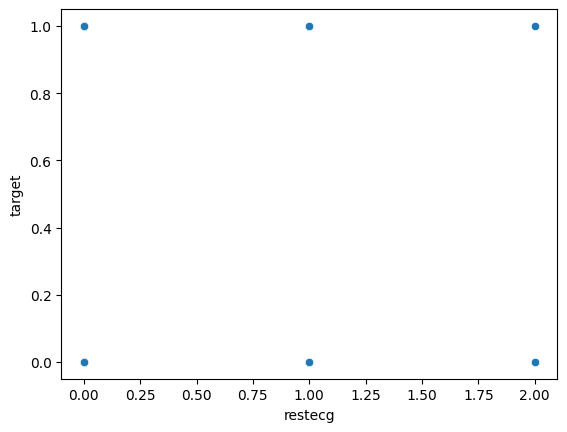

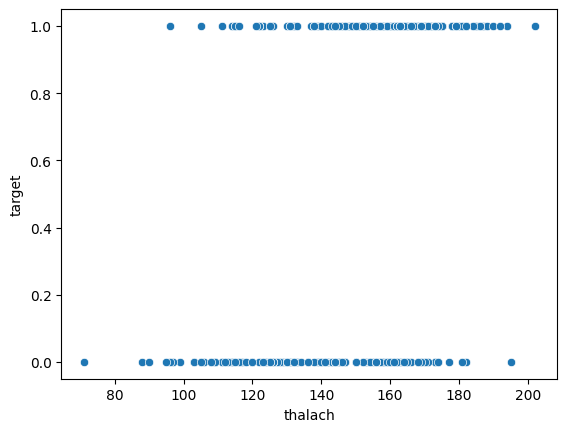

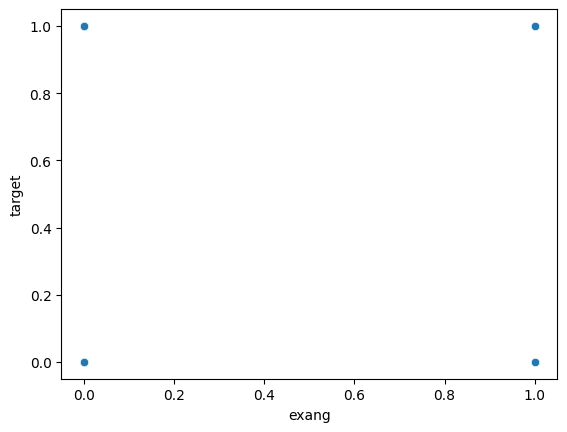

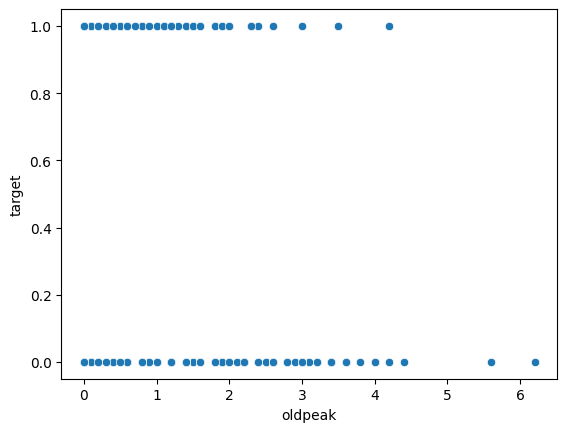

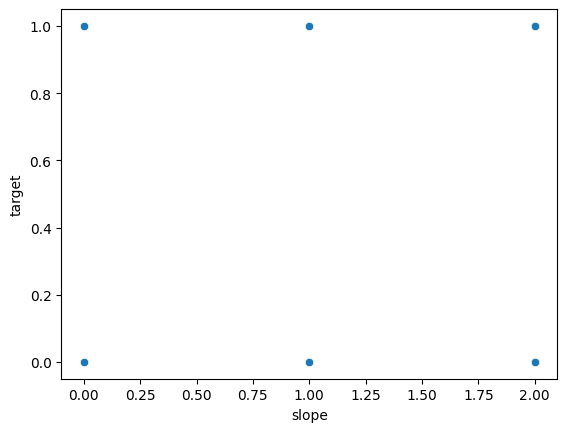

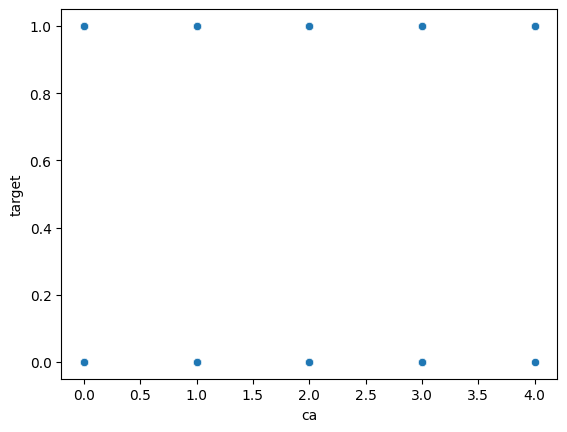

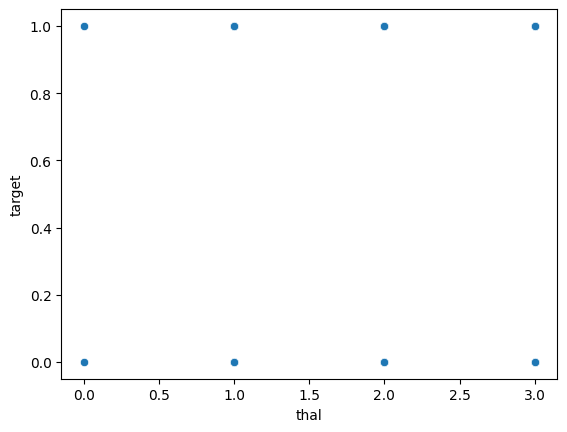

In [ ]:
# prompt: give visualization for above code

sns.scatterplot(data=hed, x="age", y="target")
plt.show()

sns.scatterplot(data=hed, x="sex", y="target")
plt.show()

sns.scatterplot(data=hed, x="cp", y="target")
plt.show()

sns.scatterplot(data=hed, x="trestbps", y="target")
plt.show()

sns.scatterplot(data=hed, x="chol", y="target")
plt.show()

sns.scatterplot(data=hed, x="fbs", y="target")
plt.show()

sns.scatterplot(data=hed, x="restecg", y="target")
plt.show()

sns.scatterplot(data=hed, x="thalach", y="target")
plt.show()

sns.scatterplot(data=hed, x="exang", y="target")
plt.show()

sns.scatterplot(data=hed, x="oldpeak", y="target")
plt.show()

sns.scatterplot(data=hed, x="slope", y="target")
plt.show()

sns.scatterplot(data=hed, x="ca", y="target")
plt.show()

sns.scatterplot(data=hed, x="thal", y="target")
plt.show()


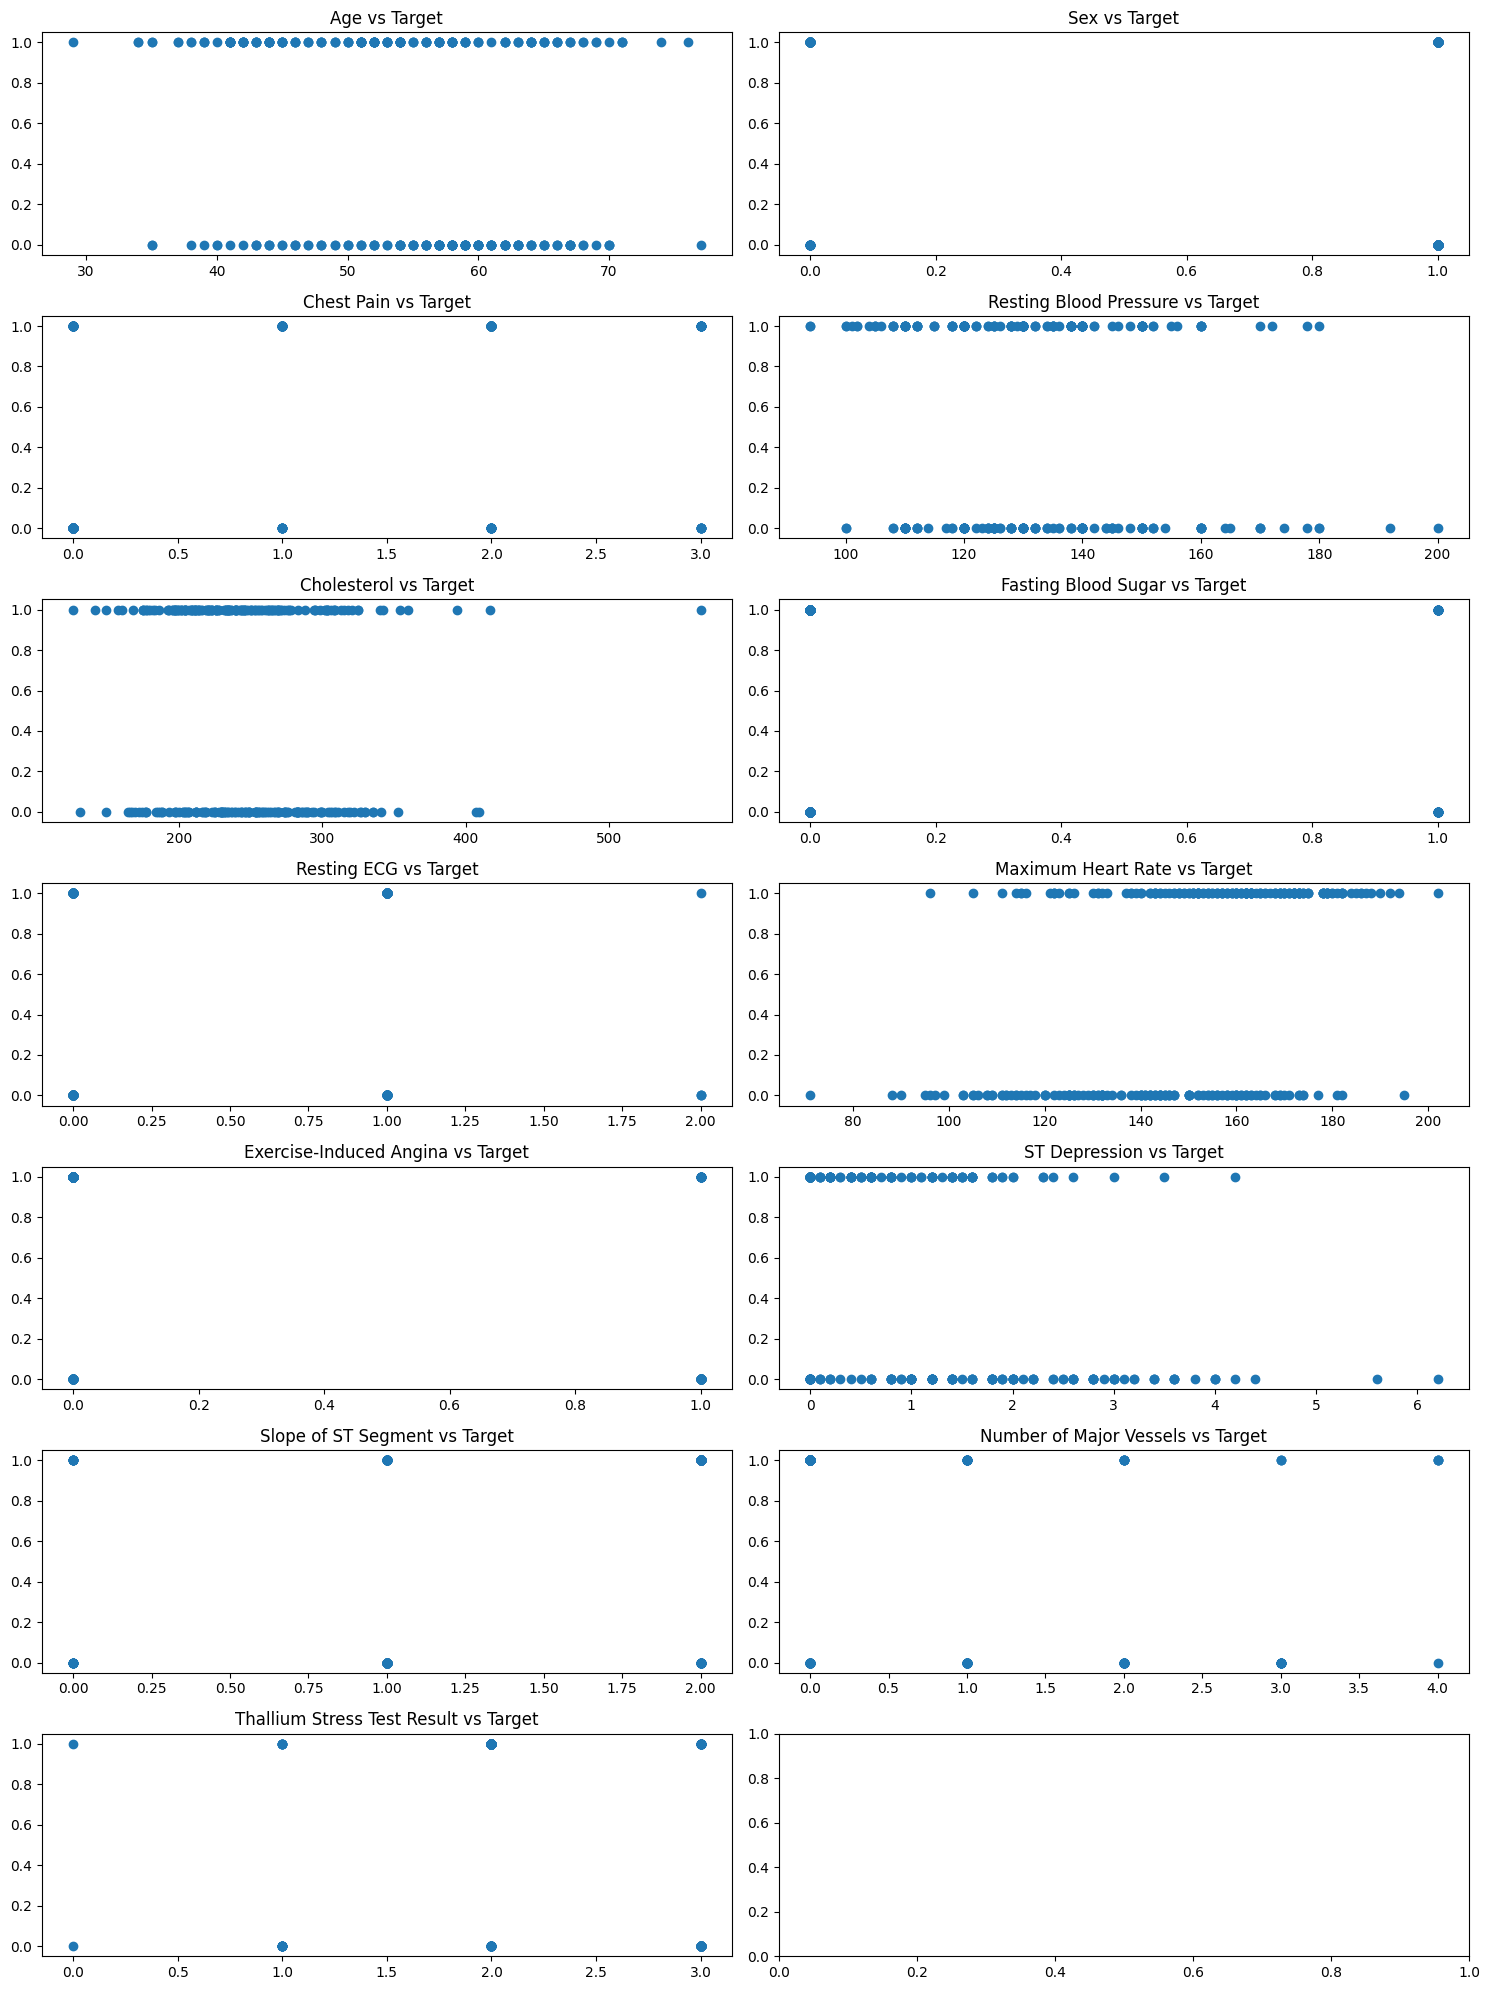

In [ ]:
# prompt: visualize the above code

import matplotlib.pyplot as plt

# Create a figure with 7 rows and 2 columns
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

# Plot each scatterplot on its corresponding axis
axes[0, 0].scatter(hed['age'], hed['target'])
axes[0, 0].set_title('Age vs Target')
axes[0, 1].scatter(hed['sex'], hed['target'])
axes[0, 1].set_title('Sex vs Target')
axes[1, 0].scatter(hed['cp'], hed['target'])
axes[1, 0].set_title('Chest Pain vs Target')
axes[1, 1].scatter(hed['trestbps'], hed['target'])
axes[1, 1].set_title('Resting Blood Pressure vs Target')
axes[2, 0].scatter(hed['chol'], hed['target'])
axes[2, 0].set_title('Cholesterol vs Target')
axes[2, 1].scatter(hed['fbs'], hed['target'])
axes[2, 1].set_title('Fasting Blood Sugar vs Target')
axes[3, 0].scatter(hed['restecg'], hed['target'])
axes[3, 0].set_title('Resting ECG vs Target')
axes[3, 1].scatter(hed['thalach'], hed['target'])
axes[3, 1].set_title('Maximum Heart Rate vs Target')
axes[4, 0].scatter(hed['exang'], hed['target'])
axes[4, 0].set_title('Exercise-Induced Angina vs Target')
axes[4, 1].scatter(hed['oldpeak'], hed['target'])
axes[4, 1].set_title('ST Depression vs Target')
axes[5, 0].scatter(hed['slope'], hed['target'])
axes[5, 0].set_title('Slope of ST Segment vs Target')
axes[5, 1].scatter(hed['ca'], hed['target'])
axes[5, 1].set_title('Number of Major Vessels vs Target')
axes[6, 0].scatter(hed['thal'], hed['target'])
axes[6, 0].set_title('Thallium Stress Test Result vs Target')


# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


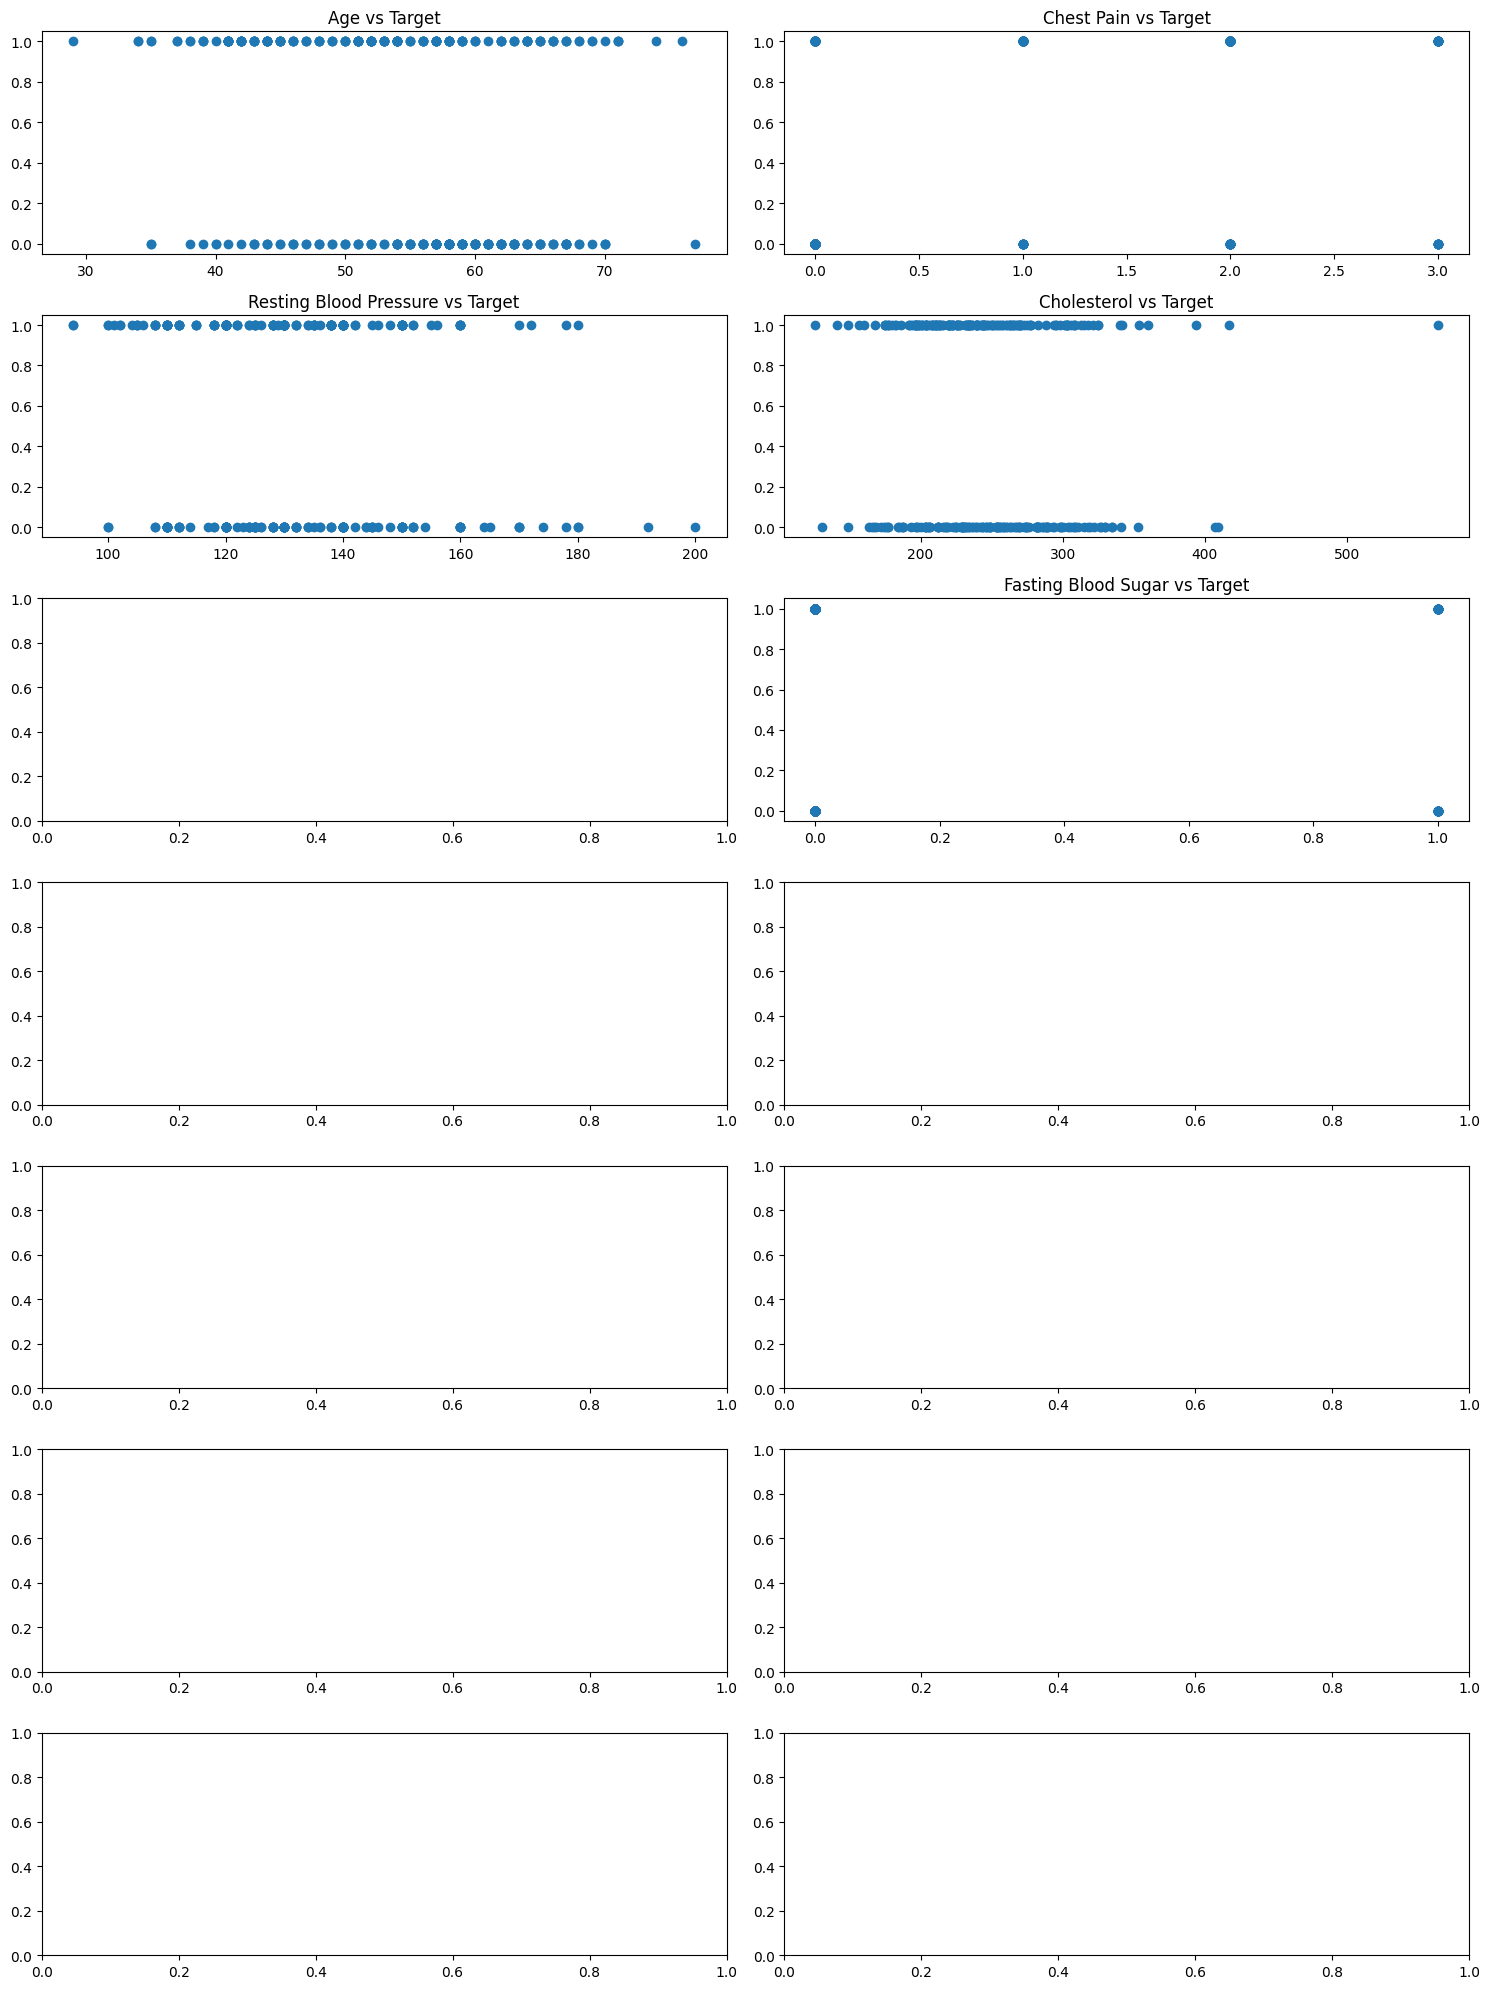

In [ ]:
# prompt: visualize the above code

import matplotlib.pyplot as plt

# Create a figure with 7 rows and 2 columns
fig, axes = plt.subplots(7, 2, figsize=(15, 20))

# Plot each scatterplot on its corresponding axis
axes[0, 0].scatter(hed['age'], hed['target'])
axes[0, 0].set_title('Age vs Target')

axes[0, 1].scatter(hed['cp'], hed['target'])
axes[0, 1].set_title('Chest Pain vs Target')
axes[1, 0].scatter(hed['trestbps'], hed['target'])
axes[1, 0].set_title('Resting Blood Pressure vs Target')
axes[1, 1].scatter(hed['chol'], hed['target'])
axes[1, 1].set_title('Cholesterol vs Target')
axes[2, 1].scatter(hed['fbs'], hed['target'])
axes[2, 1].set_title('Fasting Blood Sugar vs Target')





# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
